In [1]:
from cybergis_compute_client import CyberGISCompute
import ipywidgets

cybergis = CyberGISCompute(url="cgjobsup-dev.cigi.illinois.edu", port=3030, protocol='HTTP', isJupyter=True)

In [2]:
cybergis.list_hpc()

hpc,ip,port,is_community_account
keeling_community,keeling.earth.illinois.edu,22,True
bridges_community,bridges2.psc.edu,22,True
hadoop,hadoop01.cigi.illinois.edu,50022,False


In [3]:
cybergis.list_maintainer()

maintainer,hpc,default_hpc,job_pool_capacity,executable_folder->from_user,executable_folder->must_have
hello_world_singularity,['keeling_community'],keeling_community,5,False,not specified
community_contribution,"['keeling_community', 'bridges_community']",keeling_community,5,True,not specified


In [4]:
cybergis.list_git()

link,name,container,repository,commit
git://uncertainty_in_spatial_accessibility,Uncertainty_in_Spatial_Accessibility,cybergisx-0.4,https://github.com/JinwooParkGeographer/Uncertainty-in-Spatial-Accessibility.git,
git://spatial_access_covid-19,COVID-19 spatial accessibility,cybergisx-0.4,https://github.com/cybergis/cybergis-compute-spatial-access-covid-19.git,
git://hello_world,hello world,python,https://github.com/cybergis/cybergis-compute-hello-world.git,
git://fireabm,hello FireABM,cybergisx-0.4,https://github.com/cybergis/cybergis-compute-fireabm.git,
git://data_fusion,data fusion,python,https://github.com/CarnivalBug/data_fusion.git,
git://cybergis-compute-modules-test,modules test,cjw-eb,https://github.com/alexandermichels/cybergis-compute-modules-test.git,
git://bridge_hello_world,hello world,python,https://github.com/cybergis/CyberGIS-Compute-Bridges-2.git,


In [5]:
cpu_slider = ipywidgets.IntSlider(
    value=4,
    min=1,
    max=20,
    step=1,
    description = "# CPU",
    style= {'description_width': 'initial'}
)
walltime_slider = ipywidgets.IntSlider(
    value=20,
    min=1,
    max=120,
    step=1,
    description="Wallclock Time (min)",
    style= {'description_width': 'initial'}
)
mem_slider = ipywidgets.IntSlider(
    value=16,
    min=1,
    max=48,
    step=1,
    description='Memory (GB)',
    style= {'description_width': 'initial'}
)
display(cpu_slider, walltime_slider, mem_slider)

IntSlider(value=4, description='# CPU', max=20, min=1, style=SliderStyle(description_width='initial'))

IntSlider(value=20, description='Wallclock Time (min)', max=120, min=1, style=SliderStyle(description_width='i…

IntSlider(value=16, description='Memory (GB)', max=48, min=1, style=SliderStyle(description_width='initial'))

In [6]:
# all parameters are optional
# slurm = {
#    walltime?: string -> --time
#    num_of_node?: number -> --nodes
#    num_of_task?: number -> --ntasks
#    cpu_per_task?: number -> --cpus-per-task
#    memory?: string -> --mem
#    memory_per_cpu?: string -> --mem-per-cpu
#    memory_per_gpu?: string -> --mem-per-gpu
#    gpus?: number -> --gpus
#    gpus_per_node?: number | string -> --gpus-per-node
#    gpus_per_socket?: number | string -> --gpus-per-socket
#    gpus_per_task?: number | string -> --gpus-per-task
#    partition?: string -> --partition
#    mail_type?: string[] -> --mail-type
#    mail_user?: string[] -> --mail-user
#    modules?: string[] -> module load [module_name]
# }

# get values from the sliders
slurm = {
    "cpu_per_task": str(cpu_slider.value),
    "memory": "{}G".format(mem_slider.value),
    "walltime": "{}:00".format(walltime_slider.value),
}
print(slurm)

{'cpu_per_task': '4', 'memory': '16G', 'walltime': '20:00'}


In [7]:
demo_job = cybergis.create_job('community_contribution')

📃 created constructor file [job_constructor_16317197702QhsC.json]


In [8]:
demo_job.set(executableFolder="git://spatial_access_covid-19", slurm=slurm)

{'param': {}, 'env': {}, 'slurm': {'cpu_per_task': '4', 'memory': '16G', 'walltime': '20:00'}, 'executableFolder': 'git://spatial_access_covid-19'}


In [9]:
demo_job.submit()

✅ job submitted


id,maintainer,hpc,executableFolder,dataFolder,resultFolder,param,slurm,createdAt
16317197702QhsC,community_contribution,keeling_community,git://spatial_access_covid-19,,,{},"{""cpu_per_task"": ""4"", ""memory"": ""16G"", ""walltime"": ""20:00""}",2021-09-15T10:29:29.000Z


In [10]:
demo_job.events(liveOutput=True)

📮 Job ID: 16317197702QhsC
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


types,message,time
JOB_QUEUED,"job [16317197702QhsC] is queued, waiting for registration",2021-09-15T10:29:29.000Z
JOB_REGISTERED,"job [16317197702QhsC] is registered with the supervisor, waiting for initialization",2021-09-15T10:29:32.000Z
SLURM_UPLOAD,uploading files,2021-09-15T10:29:37.000Z
SSH_UNZIP,unzipping /data/keeling/a/cigi-gisolve/scratch/dev/16317197702QhsC/executable.zip to /data/keeling/a/cigi-gisolve/scratch/dev/16317197702QhsC/executable,2021-09-15T10:29:37.000Z
SSH_RM,removing /data/keeling/a/cigi-gisolve/scratch/dev/16317197702QhsC/executable.zip,2021-09-15T10:29:37.000Z
SSH_CREATE_FILE,create file to /data/keeling/a/cigi-gisolve/scratch/dev/16317197702QhsC/executable/job.json,2021-09-15T10:29:37.000Z
SLURM_MKDIR_RESULT,creating result folder,2021-09-15T10:29:37.000Z
SLURM_SUBMIT,submitting slurm job,2021-09-15T10:29:37.000Z
SLURM_SUBMIT_SUCCESS,slurm job submitted with slurm job id 421556,2021-09-15T10:29:37.000Z
JOB_INIT,"job [16317197702QhsC] is initialized, waiting for job completion",2021-09-15T10:29:37.000Z


In [11]:
demo_job.logs(liveOutput=True)

📮 Job ID: 16317197702QhsC
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


message,time
running setup /16317197702QhsC/result Removed 108 nodes (0.0038%) from the OSMNX network Number of nodes: 28433 Number of edges: 75895 hospital setting is done Catchment for hospital 5 complete Catchment for hospital 15 complete Catchment for hospital 0 complete Catchment for hospital 10 complete Catchment for hospital 6 complete Catchment for hospital 1 complete Catchment for hospital 11 complete Catchment for hospital 16 complete Catchment for hospital 7 complete Catchm...[download for full log],2021-09-15T10:33:33.000Z
"0%| | 0/75895 [00:00<?, ?it/s] 53%|█████▎ | 40511/75895 [00:00<00:00, 405107.49it/s] 100%|██████████| 75895/75895 [00:00<00:00, 408191.22it/s] Pop Centroid File Setting: 0%| | 0/878 [00:00<?, ?it/s] Pop Centroid File Setting: 2%|▏ | 17/878 [00:00<00:05, 162.43it/s] Pop Centroid File Setting: 4%|▍ | 34/878 [00:00<00:05, 163.81it/s] Pop Centroid File Setting: 6%|▌ | 51/878 [00:00<00:05, 164.69it/s] Pop Centroid File Setting: 8%|▊ ...[download for full log]",2021-09-15T10:33:33.000Z


In [12]:
result_zip = demo_job.downloadResultFolder('./')

file successfully downloaded under: ./1631719772sG71.zip


In [13]:
import os, shutil, zipfile
extract_results_to = "access_result/"
if os.path.exists(extract_results_to):
    shutil.rmtree(extract_results_to)
os.mkdir(extract_results_to)
with zipfile.ZipFile(result_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_results_to)

<AxesSubplot:>

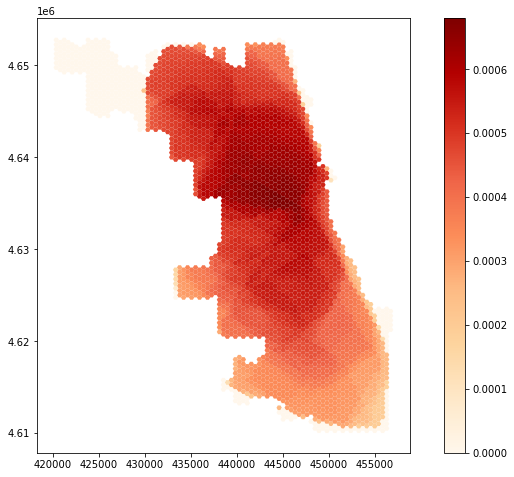

In [14]:
import geopandas as gpd
result = gpd.read_file(os.path.join(extract_results_to, "result.geojson"))
result.plot(column="hospital_vents", cmap="OrRd", legend=True, figsize=(12,8))